In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
% matplotlib inline

In [13]:
def rbf_kernel_pca(X, gamma, n_components):
    
    # calculate pairwise squared euclidean distances
    sq_dists = pdist(X, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    # center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # run eigen decomposition and return in increasing magnitude
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (which are already projected)
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

### Now we can separate half-moon shapes

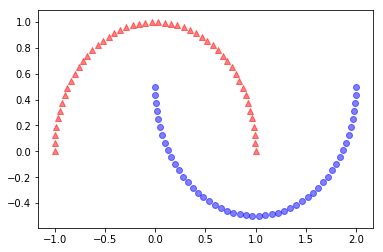

In [14]:
# create half moons

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color = "red", marker = "^", alpha = .5)
plt.scatter(X[y == 1, 0], X[y==1, 1],
            color = "blue", marker = "o", alpha = .5)
plt.show()

run regular pca and kernel pca to see the difference

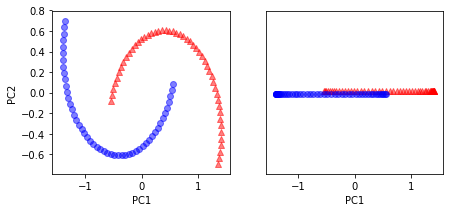

In [15]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
             color = "red", marker = "^", alpha = .5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y==1, 1],
            color = "blue", marker = "o", alpha = .5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1)) + .02,
             color = "red", marker = "^", alpha = .5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - .02,
            color = "blue", marker = "o", alpha = .5)

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
plt.show()

We see above that we are not able to linearly separate the two "classes".

How does the radial basis function kernel pca work?

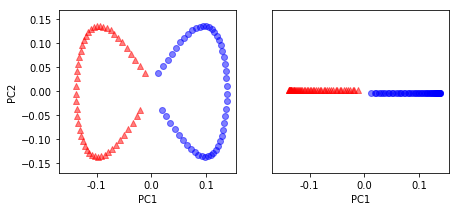

In [16]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (7, 3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
             color = "red", marker = "^", alpha = .5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y==1, 1],
            color = "blue", marker = "o", alpha = .5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1)) + .02,
             color = "red", marker = "^", alpha = .5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - .02,
            color = "blue", marker = "o", alpha = .5)

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")
ax[0].xaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
ax[1].xaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
plt.show()

Great! The two "classes" are now linearly separable